In [1]:
from meta_stuff import process_set
from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker
from nilearn import plotting as niplt
from pyns import Neuroscout
import nibabel as nib
%matplotlib inline

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


# Single-predictor models for key features
Meta-analyses of 16 different features: 11 ClarifAI labels, 3 other visual features (face detection, brightness, and shot change), and 2 audio features (overall volume, and presence of speech). Each model contains only the target feature plus standard nuisance covariates.

In [2]:
api = Neuroscout()

In [3]:
from pathlib import Path
import json
json_data = json.load((Path('../models') / 'single_predictor.json').open())

In [41]:
collection_kwargs={'cli_version':'0.5.4-rc', 'estimator': 'afni', 'level': 'GROUP'}
for analysis_name, i in json_data.items():
for dataset_name, d in i.items():
    for task_name, hash_id in d.items():
        an = api.analyses.get_analysis(hash_id)
        uploads = an.load_uploads(**collection_kwargs)
        if uploads:
            for i in uploads:
                niplt.plot_stat_map(i[0], title=f"{i[1]['task']}-{i[1]['stat']}", 
                                    cut_coords=[-24, -12, 0, 12, 24, 36, 48, 60], display_mode='z')

KeyError: "'12yearsaslave'"

In [42]:
%debug

> /home/alejandro/src/pyns/pyns/api.py(72)_build_path()
     70             new_path = new_path.replace('[%s]' % pattern, chunk)
     71 
---> 72         return new_path.format(base_url=self._api_base_url, route=route)
     73 
     74     def _make_request(self, request, route, sub_route=None, id=None,

ipdb> u
> /home/alejandro/src/pyns/pyns/api.py(103)_make_request()
    101 
    102         headers = headers or self._get_headers()
--> 103         route = self._build_path(route, sub_route=sub_route, id=id)
    104 
    105         resp = request_function(

ipdb> u
> /home/alejandro/src/pyns/pyns/models/analysis.py(263)get_analysis()
    261         :return: Analysis object
    262         """
--> 263         return Analysis(analyses=self, **self.get(id=id))
    264 
    265     def compile(self, id,  build=True):

ipdb> u
> <ipython-input-41-4d94d845cad7>(4)<module>()
      2 for dataset_name, d in json_data.items():
      3     for task_name, hash_id in d.items():
----> 4         a

....................................

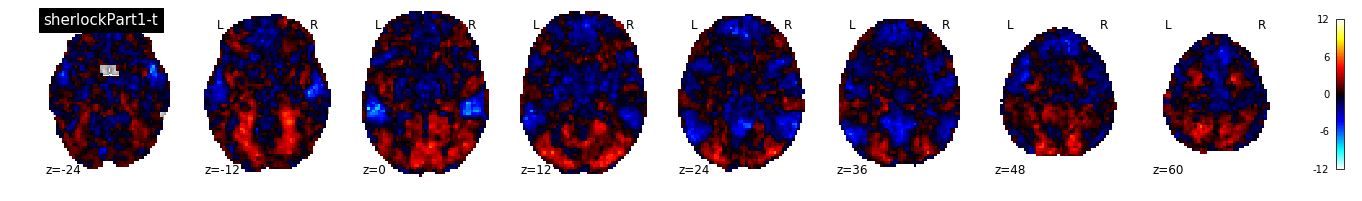

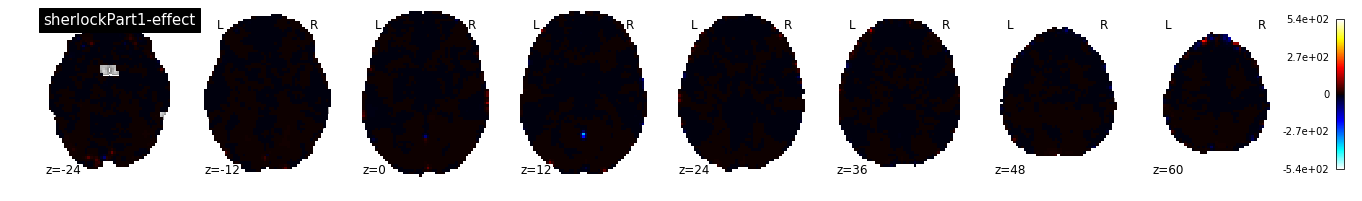

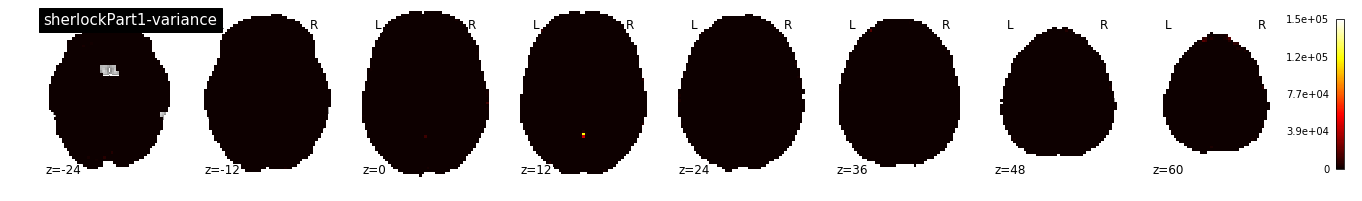

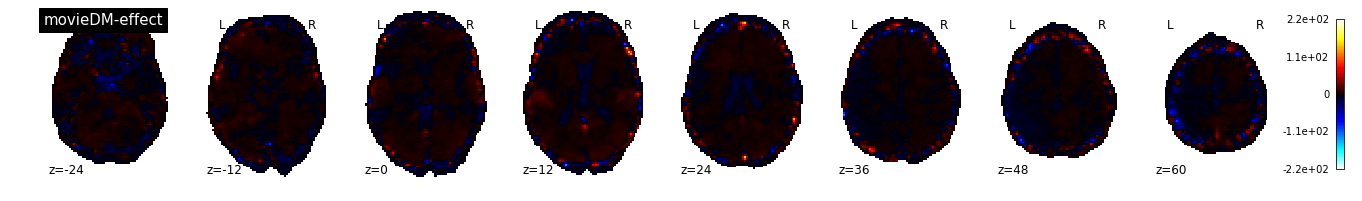

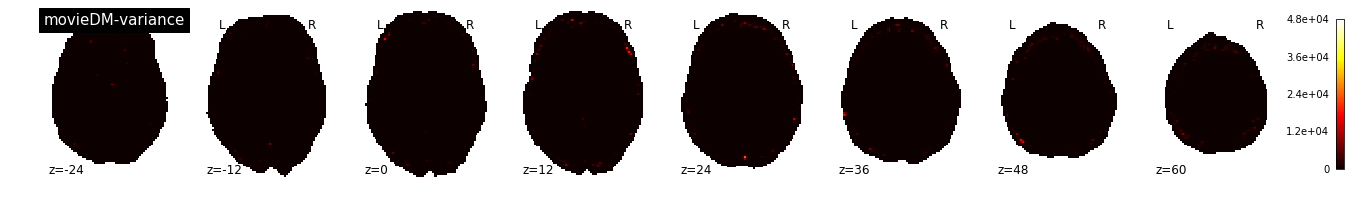

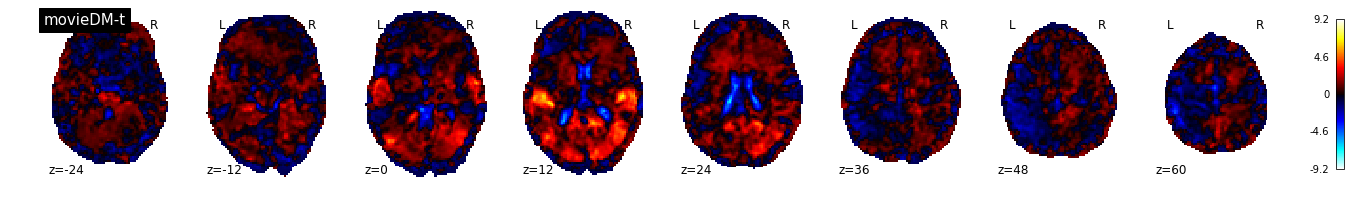

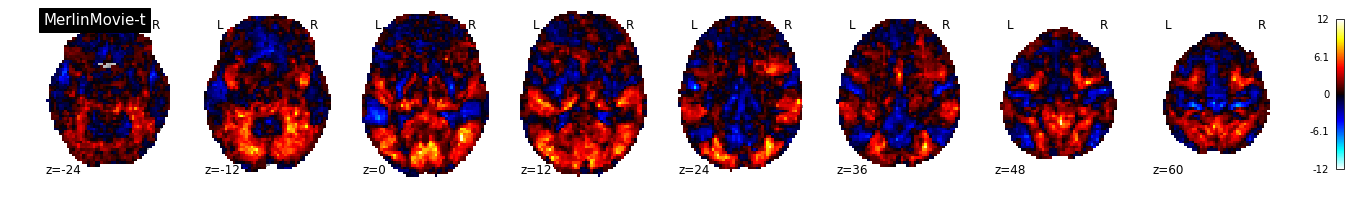

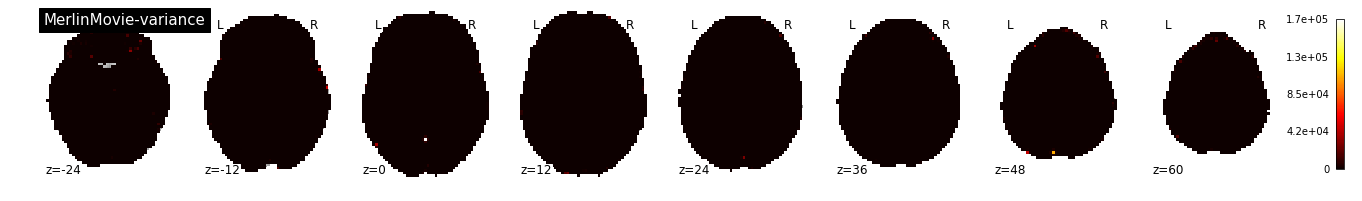

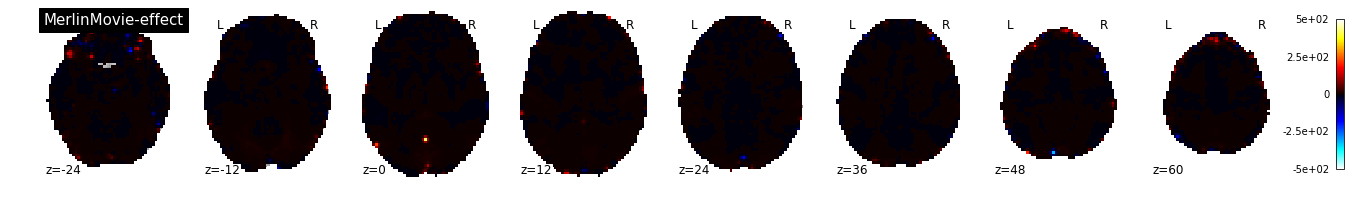

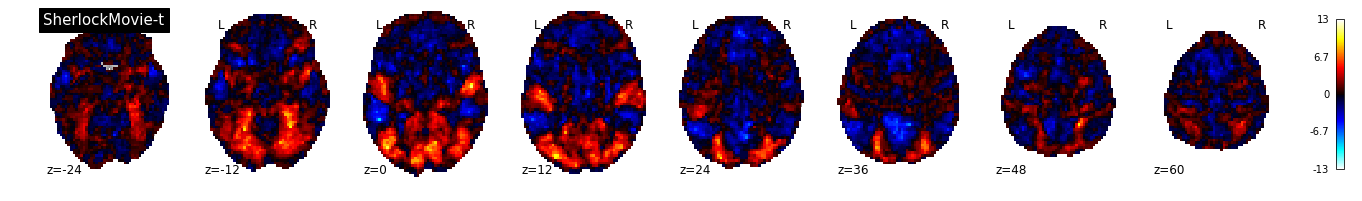

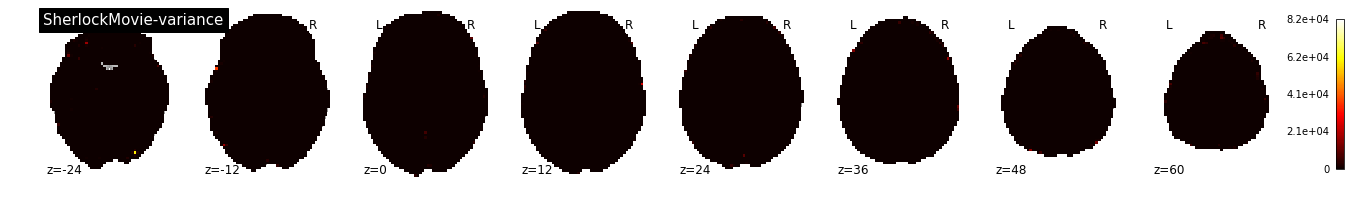

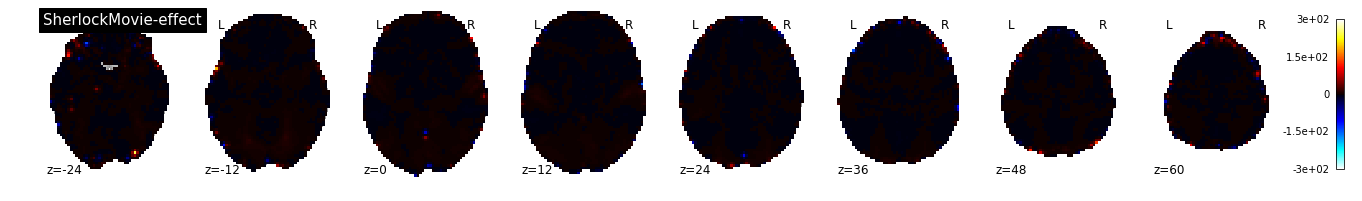

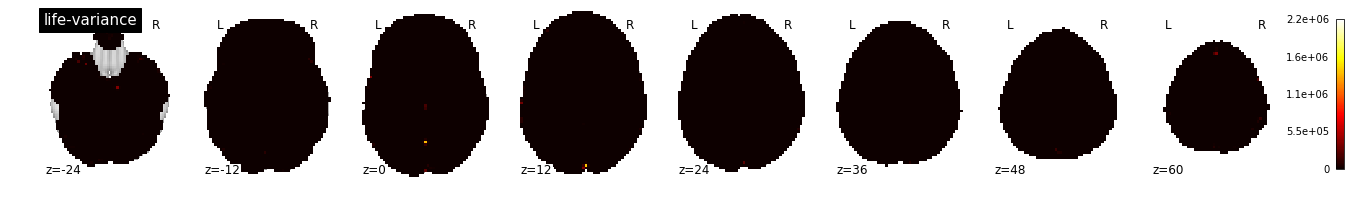

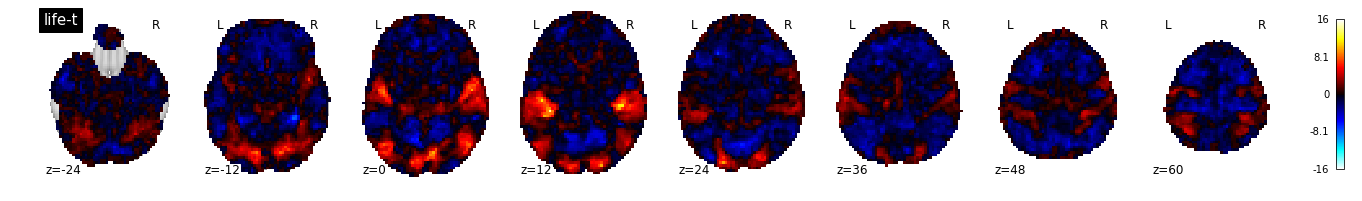

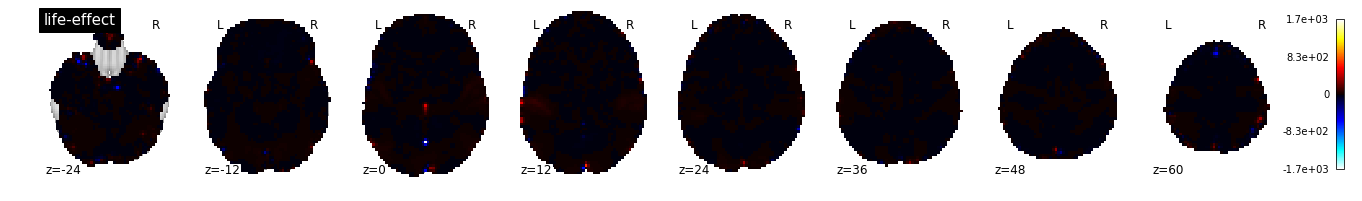

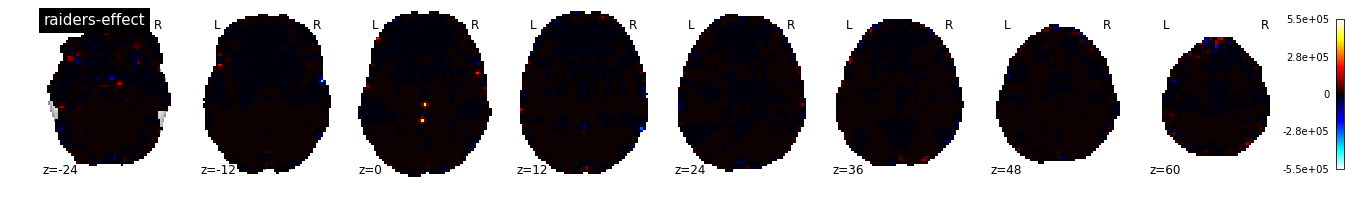

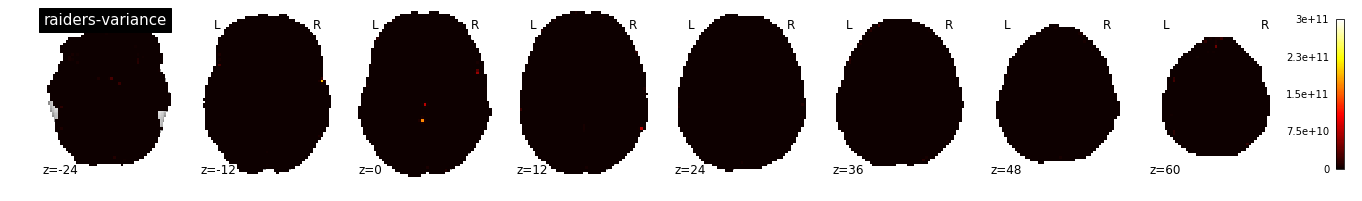

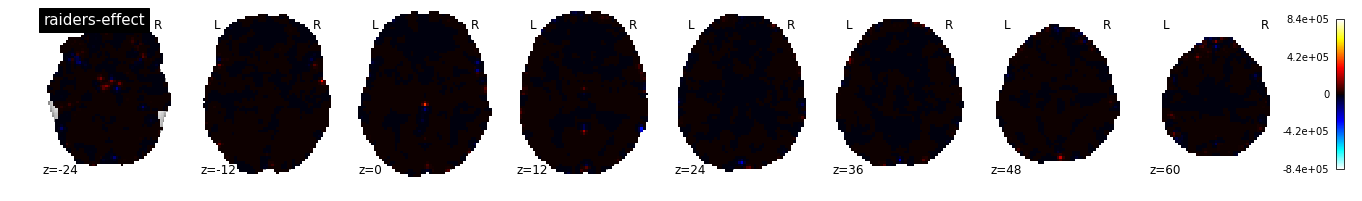

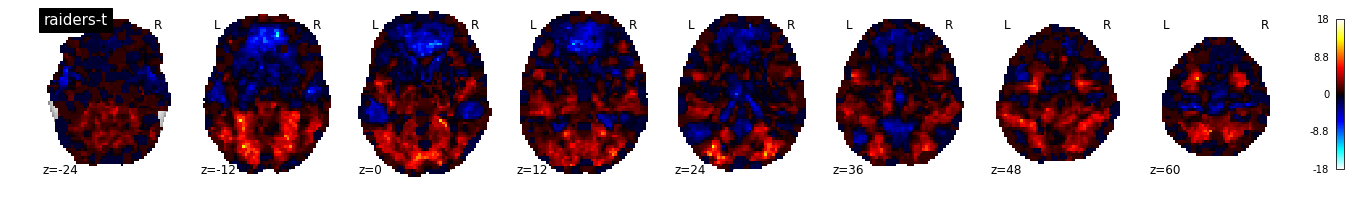

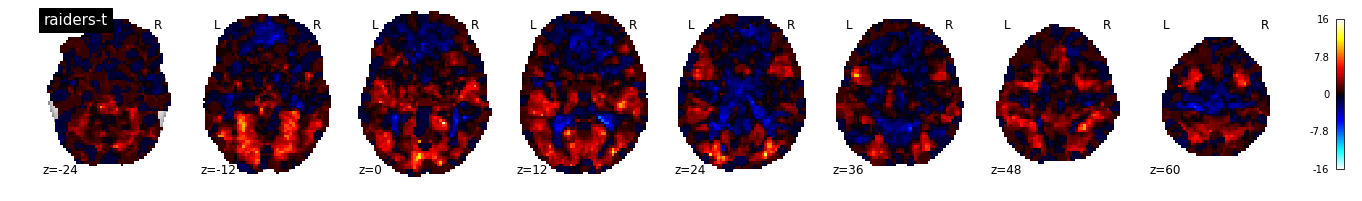

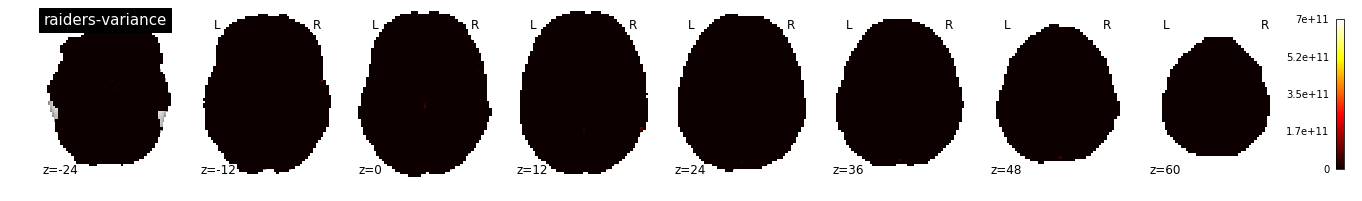

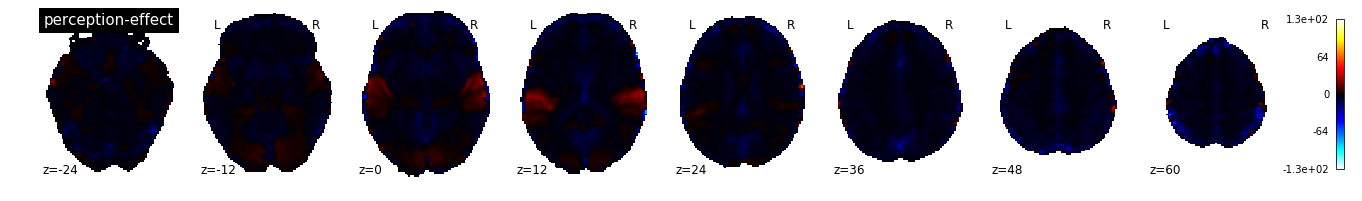

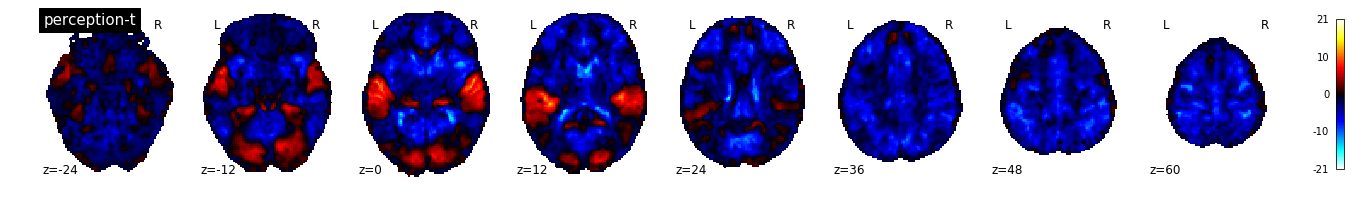

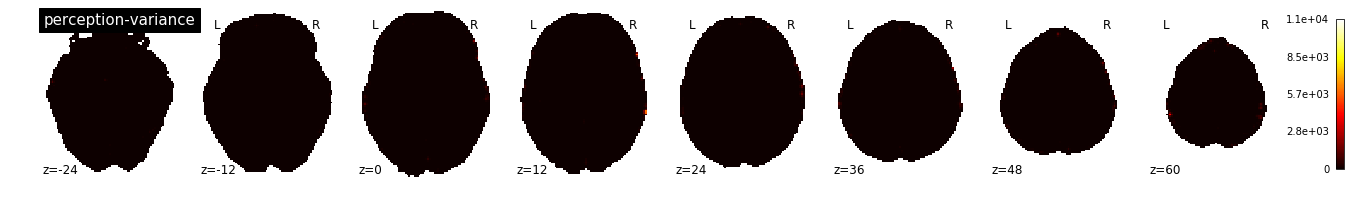

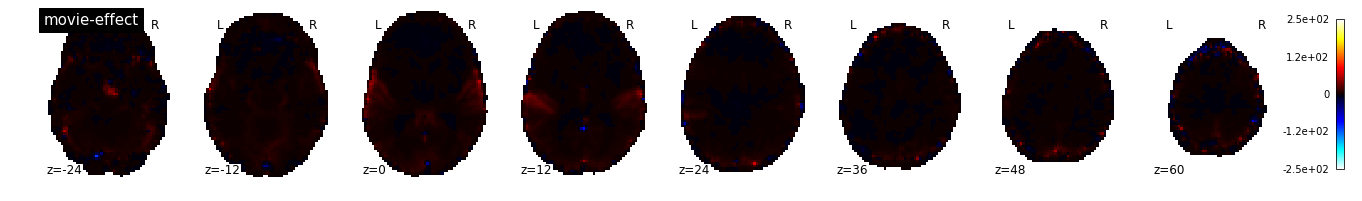

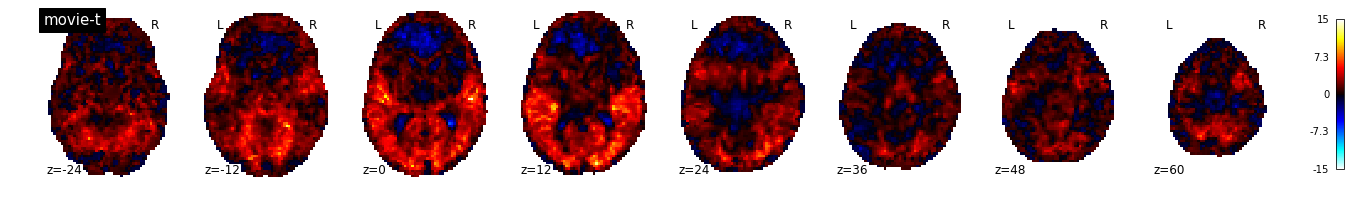

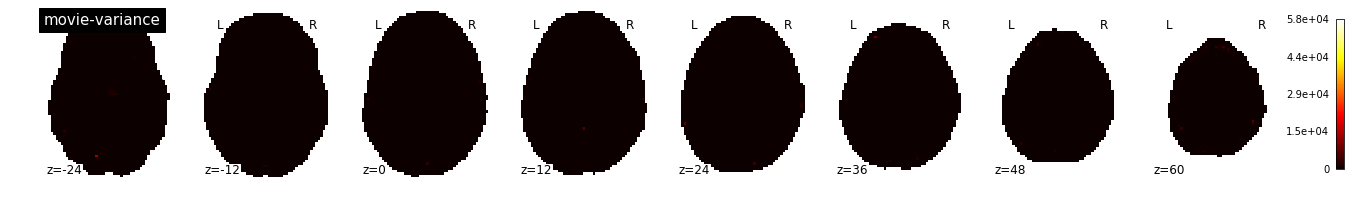

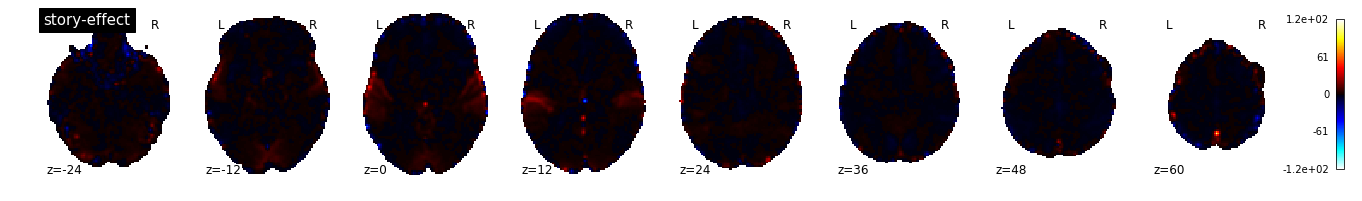

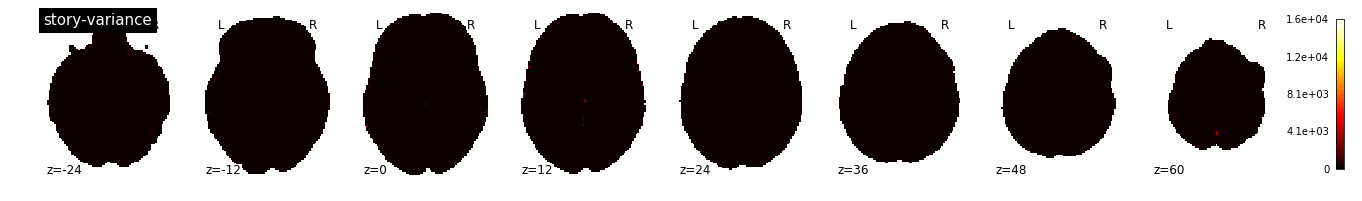

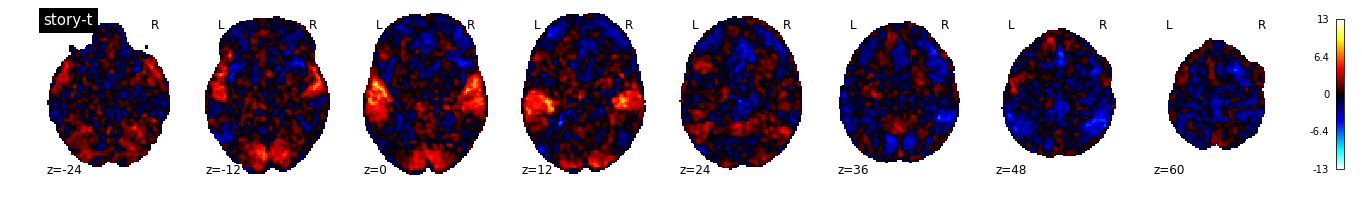

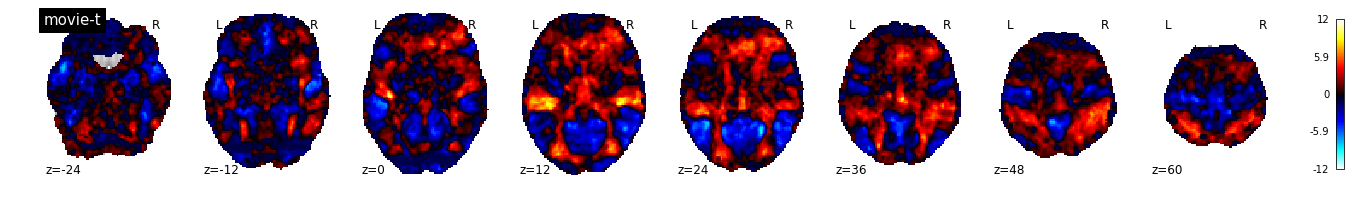

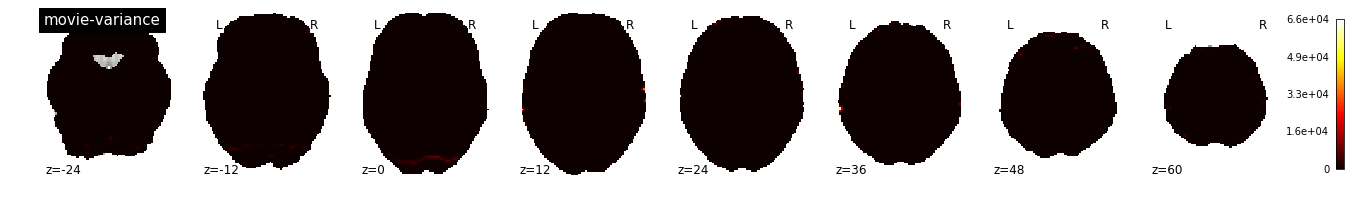

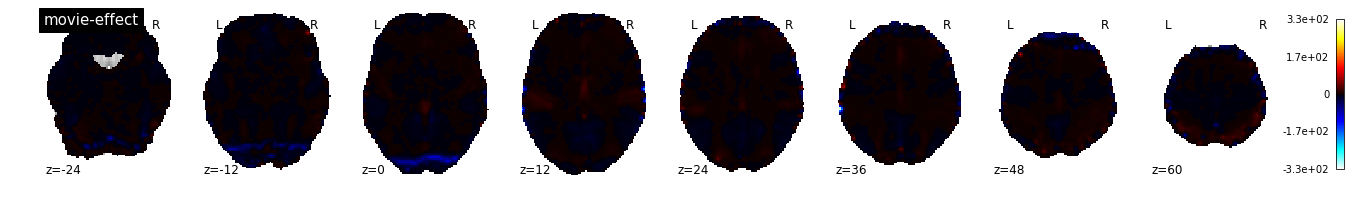

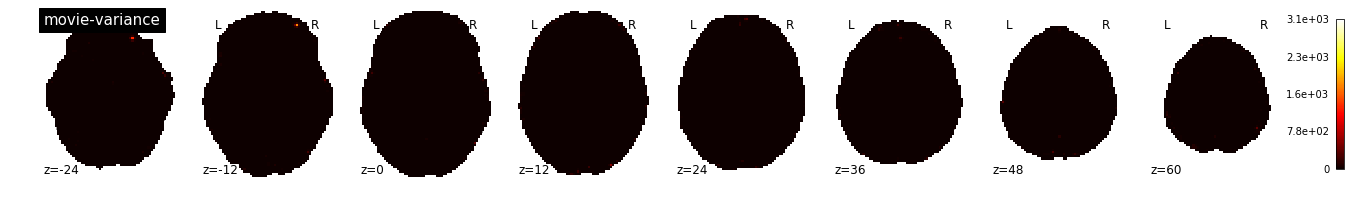

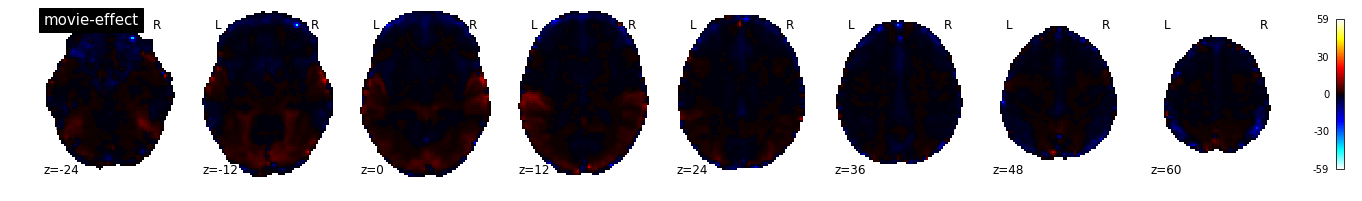

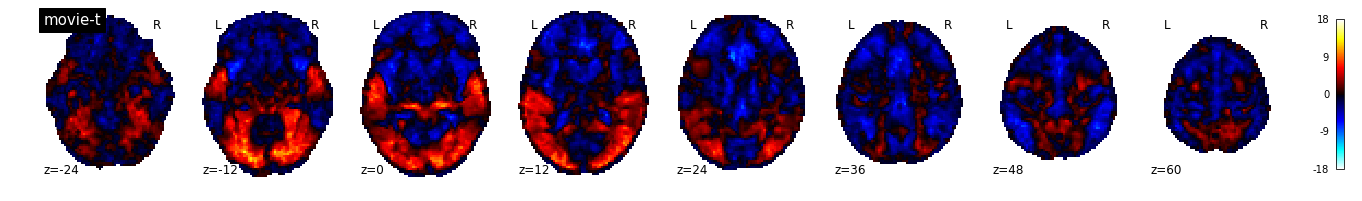

In [98]:
collection_kwargs={'estimator': 'nistats', 'level': 'GROUP'}
for dataset_name, d in rms['rms'].items():
    for task_name, hash_id in d.items():
        an = api.analyses.get_analysis(hash_id)
        uploads = an.load_uploads(**collection_kwargs)
        if uploads:
            for i in uploads:
                niplt.plot_stat_map(i[0], title=f"{i[1]['task']}-{i[1]['stat']}", 
                                    cut_coords=[-24, -12, 0, 12, 24, 36, 48, 60], display_mode='z')

# Meta-Analysis

Skipped ids: 3dsw6 eob53 due to no matching collections


INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 11 studies for effect: rms


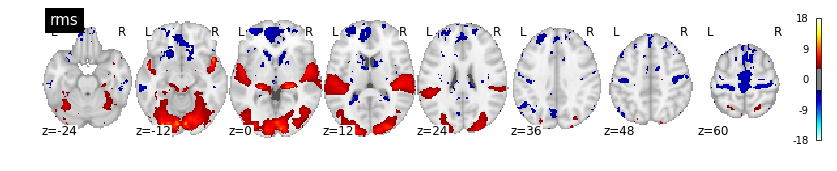

In [9]:
# AFNI, smoothing fixed, no NNDB
nimare_imgs = process_set('rms', json_data=rms, 
                          download=True, overwrite=True, 
                          exclude=['littlemisssunshine', 'theshawshankredemption', 'theusualsuspects', '12yearsaslave', '500daysofsummer', 'backtothefuture', 'pulpfiction', 'theprestige', 'split', 'citizenfour'], 
                          collection_kwargs={'cli_version':'0.5.4-rc', 'estimator': 'afni'},
                          plot_kwargs=dict(vmax=18, threshold=3.3)
                         )

Skipped ids: 3dsw6 eob53 due to no matching collections


INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 8 studies for effect: rms


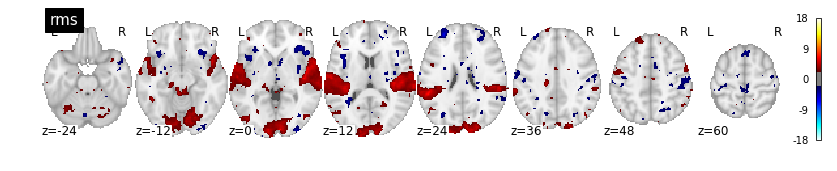

In [26]:
# AFNI, smoothing fixed, only NNDB (missing two)
nimare_imgs = process_set('rms', json_data=rms, 
                          download=True, overwrite=True, 
                          exclude=['SherlockMovie', 'raiders', 'movie', 'story', 'life', 'MerlinMovie', 'sherlockPart1', 'perception', 'movieDM'],
                          collection_kwargs={'cli_version':'0.5.4-rc', 'estimator': 'afni'},
                          plot_kwargs=dict(vmax=18, threshold=2.3)
                         )

Skipped ids: 3dsw6 eob53 due to no matching collections


INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 19 studies for effect: rms


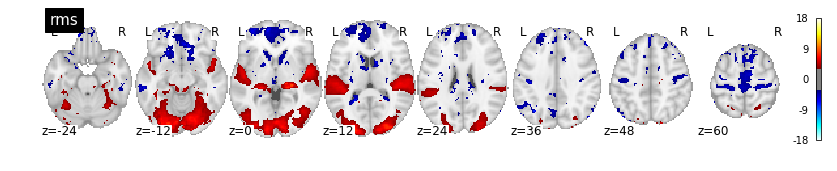

In [37]:
# AFNI, smoothing fixed, all
afni_fixed_all = process_set('rms', json_data=rms, 
                          download=True, overwrite=True, 
                          collection_kwargs={'cli_version':'0.5.4-rc', 'estimator': 'afni'},
                          plot_kwargs=dict(vmax=18, threshold=3.3)
                         )

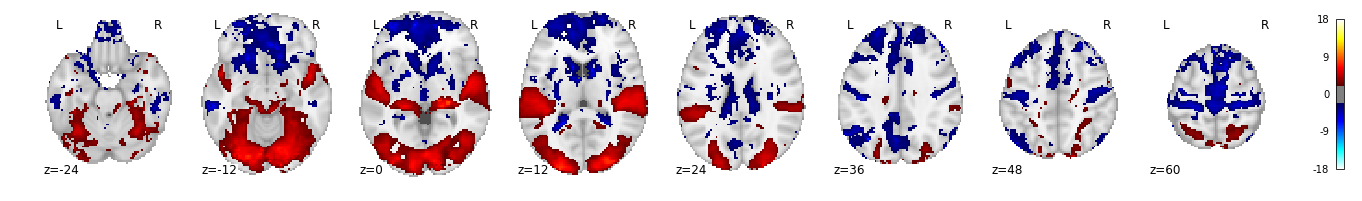

In [38]:
niplt.plot_stat_map(afni_fixed_all[0], display_mode='z', cut_coords=[-24, -12, 0, 12, 24, 36, 48, 60], **dict(vmax=18, threshold=2.3))

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 11 studies for effect: rms


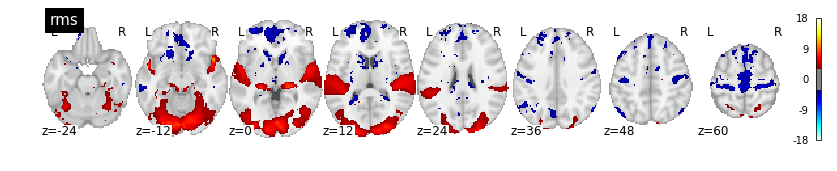

In [32]:
# AFNI bad smooting, no NNDB
afni_bad_nonndb = process_set('rms', json_data=rms, download=True, overwrite=True, exclude=['littlemisssunshine', 'theshawshankredemption', 'theusualsuspects', '12yearsaslave', '500daysofsummer', 'backtothefuture', 'pulpfiction', 'theprestige', 'split', 'citizenfour'], 
                              collection_kwargs={'cli_version':'0.5.3', 'estimator': 'afni'},
                              plot_kwargs=dict(vmax=18, threshold=3.3)
)

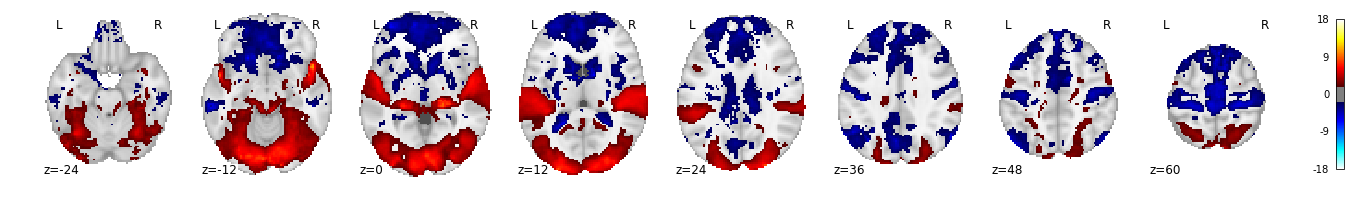

In [36]:
niplt.plot_stat_map(afni_bad_nonndb[0], display_mode='z', cut_coords=[-24, -12, 0, 12, 24, 36, 48, 60], **dict(vmax=18, threshold=2))

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 10 studies for effect: rms


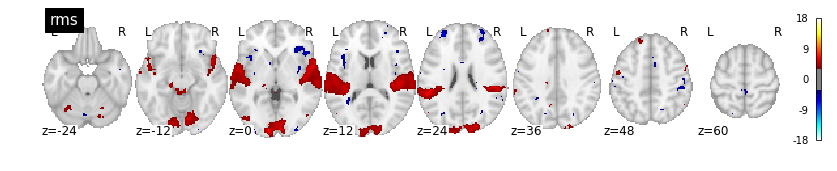

In [22]:
# AFNI bad smooting, NNDB only
afni_bad_nonndb = process_set('rms', json_data=rms, download=True, overwrite=True, 
                              exclude=['raiders', 'movie', 'story', 'life', 'MerlinMovie', 'sherlockPart1', 'perception', 'movieDM'],
                              collection_kwargs={'cli_version':'0.5.3', 'estimator': 'afni'},
                              plot_kwargs=dict(vmax=18, threshold=3.3)
)

INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 21 studies for effect: rms


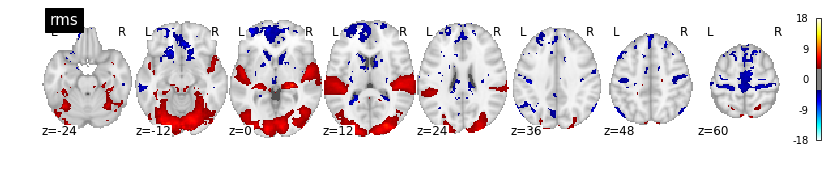

In [23]:
#  AFNI Bad smoohing, all
afni_bad_nndb = process_set('rms', json_data=rms, download=True, overwrite=True,
                            collection_kwargs={'cli_version':'0.5.3', 'estimator': 'afni'},
                            plot_kwargs=dict(vmax=18, threshold=3.3)
                           )

Skipped ids: h4j3t ch649 ziy7m 3z8hw 3dsw6 a8ubz ebocw 6pw42 jkzxi eob53 due to no matching collections


INFO:nimare.extract.utils:Dataset found in /home/alejandro/repos/neuroscout-paper/meta/images/rms

INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'
INFO:nimare.utils:Shared path detected: '/home/alejandro/repos/neuroscout-paper/meta/images/rms/'


meta-analyzing 11 studies for effect: rms


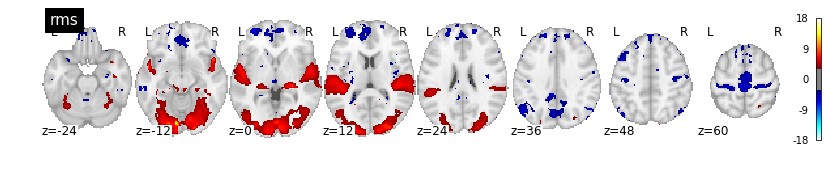

In [25]:
# Nilearn, no NNDB
nilearn_nndb = process_set('rms', json_data=rms, download=True, overwrite=True, 
                           exclude=['littlemisssunshine', 'theshawshankredemption', 'theusualsuspects', '12yearsaslave', '500daysofsummer', 'backtothefuture', 'pulpfiction', 'theprestige', 'split', 'citizenfour'], 
                           collection_kwargs={'estimator':'nistats'},
                           plot_kwargs=dict(vmax=18, threshold=3.3)
                          )